<a href="https://colab.research.google.com/github/byfurkation/TelecomX_datos/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". **La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.**

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

##📌 Extracción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

Este es el primer paso para transformar los datos en información valiosa. ¿Listo para programar? 🚀

### **Ayuda a visualizar un archivo un formato Json en la web.**

https://jsonviewer.stack.hu/



In [ ]:
# Procederemos a cargar un archivo Json, Por lo cual como primer paso
# necesitamos importar pandas y Json
import pandas as pd
import json

In [ ]:
df = pd.read_json('https://raw.githubusercontent.com/byfurkation/TelecomX_datos/d3d77c77396a50d0951630ec521dc3b048607b6f/TelecomX_Data.json')

df.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


### **Resultado**
De esta manera queda guardado automáticamente en un Data frame nuestra información, pues al aplicarle el método read a cualquier importación de archivos se transforma automáticamente en uno.

##🔧 Transformación

In [ ]:
# Normalizamos cada columna con diccionarios
df_customer = pd.json_normalize(df['customer'])
df_phone    = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account  = pd.json_normalize(df['account'])

# Concatenamos todas las columnas nuevas con el DataFrame original
df_normalizado = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                      df_customer, df_phone, df_internet, df_account], axis=1)


In [ ]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_normalizado.sample(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6565,9029-FEGVJ,No,Female,1,Yes,No,32,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,No,Mailed check,79.30,2570
2818,3908-BLSYF,Yes,Female,0,No,No,6,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,83.90,497.55
2400,3349-ANQNH,No,Female,1,No,No,59,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,99.50,5890
1686,2387-KDZQY,No,Male,0,No,No,17,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.10,279.5
3367,4676-WLUHT,No,Male,0,No,No,54,No,No phone service,DSL,...,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),46.20,2431.95
5361,7321-KKSDU,No,Male,0,No,Yes,32,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.50,696.8
2665,3712-PKXZA,No,Male,0,Yes,No,61,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.55,1252
5540,7593-JNWRU,Yes,Male,0,Yes,Yes,6,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.60,260.8
6743,9290-SHCMB,No,Female,1,No,No,13,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.85,1235.55
539,0769-MURVM,No,Female,0,Yes,Yes,72,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),65.70,4575.35


### **Conoce el conjunto de datos**

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, se creó un diccionario de datos con la descripción de cada columna, mismo que se encuentra en el repositorio bajo el nombre de "TelecomX_diccionario.md".



### **Diccionario de datos**

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

### **Tarea 1:** Explorar las columnas del dataset y verificar sus tipos de datos.


In [ ]:
# Observamos que la totalidad de su registro son 7,267, y en sus columnas cada
# una registra los mismos con los datos no nulo.
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### **Tarea 2**: Consultar el diccionario para comprender mejor el significado de las variables.


In [ ]:
# Valores unicos de una columna
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
# Ver valores únicos y sus frecuencias para todas las columnas

for col in df_normalizado.columns:
    print(f"--- {col} ---")
    print(df_normalizado[col].value_counts(dropna=False))  # incluye NaN si existen
    print()

--- customerID ---
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

--- Churn ---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

--- gender ---
gender
Male      3675
Female    3592
Name: count, dtype: int64

--- SeniorCitizen ---
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

--- Partner ---
Partner
No     3749
Yes    3518
Name: count, dtype: int64

--- Dependents ---
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

--- tenure ---
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

--- PhoneService ---
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3495
Yes                 3065
No phone s

#### **Decisión de análisis clave**

Antes de transformar o eliminar datos, se debe entender qué significan los valores faltantes y cómo afectan el análisis. Como en este caso es un ejercicio didáctico, podemos aplicar criterios lógicos con justificación.

**Columna: Churn**

Valores únicos:

"No": 5174

"Yes": 1869

" " (espacios vacíos): 224

Esta **columna define si un cliente abandonó o no el servicio**, lo cual es clave para análisis predictivo.

Se eliminaránn 224 registros (~3%) con datos faltantes en la columna Churn, ya que esta representa la variable objetivo del análisis y no se puede inferir razonablemente su valor.

In [ ]:
# eliminar filas vacías de churn 224+7043= 7, 267

# Eliminar filas donde Churn es solo un espacio
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

### **Tarea 3:** Identificar las columnas más relevantes para el análisis de evasión.

🎯 Objetivo asumido:

Analizar y predecir el "Churn" (si un cliente se va o se queda)

1. tenure (meses de contrato)

🧠 Relevancia: Refleja el tiempo de permanencia. Clientes con menor tenure son más propensos a irse.

🧪 Análisis: Puedes hacer histogramas, segmentaciones, correlaciones con Churn.

2. Contract (tipo de contrato: mensual, anual...)

🧠 Relevancia: Clientes con contrato mes a mes tienden a irse más fácilmente.

📊 Ideal para gráficos de barras o análisis de riesgo.

3. PaymentMethod (forma de pago)

💳 Pagos automáticos vs. manuales podrían influir.

🎯 A menudo se asocia a abandono por fricción en pagos.

4. Charges.Monthly y Charges.Total

💵 Clientes con cargos más altos pueden estar menos satisfechos.

También pueden indicar uso intensivo (más fidelidad).

Útiles para crear grupos de riesgo por gasto.

5. InternetService y servicios relacionados:

InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

🧠 Estos servicios son opcionales y reflejan nivel de compromiso y satisfacción.

Algunos modelos han demostrado que la combinación de servicios influye fuertemente en la retención.

6. PaperlessBilling

📥 Puede parecer menor, pero se ha encontrado correlación entre este tipo de facturación y cancelación: refleja preferencia por lo digital y menos fricción al cambiar de proveedor.

7. PhoneService y MultipleLines

🔁 Relacionados con fidelización: clientes que contratan más de un servicio tienden a quedarse más.

⚖️ Variables demográficas (prioridad media)

Estas no siempre son predictoras fuertes, pero pueden dar contexto:

SeniorCitizen: Algunos estudios muestran que personas mayores son más estables en sus servicios.

Partner y Dependents: Pueden reflejar estabilidad o necesidad de varios servicios.

gender: Usualmente no es significativa para Churn por sí sola, pero puede considerarse por completitud.




### **Tarea 4** Comprobación de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

 0   customerID        7043 non-null   object ok

 1   Churn             7043 non-null   object boolean

 2   gender            7043 non-null   object ok

 3   SeniorCitizen     7043 non-null   int64  ok

 4   Partner           7043 non-null   object boolean

 5   Dependents        7043 non-null   object boolean

 6   tenure            7043 non-null   int64  ok

 7   PhoneService      7043 non-null   object int64

 8   MultipleLines     7043 non-null   object boolean

 9   InternetService   7043 non-null   object boolean

 10  OnlineSecurity    7043 non-null   object boolean

 11  OnlineBackup      7043 non-null   object boolean

 12  DeviceProtection  7043 non-null   object boolean

 13  TechSupport       7043 non-null   object boolean

 14  StreamingTV       7043 non-null   object boolean

 15  StreamingMovies   7043 non-null   object boolean

 16  Contract          7043 non-null   object ok

 17  PaperlessBilling  7043 non-null   object boolean

 18  PaymentMethod     7043 non-null   object ok

 19  Charges.Monthly   7043 non-null   float64 ok

 20  Charges.Total     7043 non-null   object float 64

### **Tarea 5** Manejo de inconsistencias

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [ ]:
# El método .copy() solo se ejecuta una vez para cortar cualquier vínculo con
# una vista temporal y evitar las advertencias como SettingWithCopyWarning.
df_normalizado = df_normalizado.copy()

In [ ]:
# limpiar valores no numéricos
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].replace(' ', pd.NA)

In [ ]:
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

In [ ]:
df_normalizado['Charges.Total'].dtypes  # Debería devolver: dtype('float64')

dtype('float64')

In [ ]:
# 1. Churn: "Yes" → True, "No" → False
df_normalizado['Churn'] = df_normalizado['Churn'].map({'Yes': True, 'No': False})

# 2. SeniorCitizen: 1 → True, 0 → False
df_normalizado['SeniorCitizen'] = df_normalizado['SeniorCitizen'].map({1: True, 0: False})

# 3. Partner: "Yes" → True, "No" → False
df_normalizado['Partner'] = df_normalizado['Partner'].map({'Yes': True, 'No': False})

# 4. Dependents: "Yes" → True, "No" → False
df_normalizado['Dependents'] = df_normalizado['Dependents'].map({'Yes': True, 'No': False})

# 5. PhoneService: "Yes" → True, "No" → False
df_normalizado['PhoneService'] = df_normalizado['PhoneService'].map({'Yes': True, 'No': False})

# 6. PaperlessBilling: "Yes" → True, "No" → False
df_normalizado['PaperlessBilling'] = df_normalizado['PaperlessBilling'].map({'Yes': True, 'No': False})

In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [ ]:
# La diferencia de 11 valores (7043 vs. 7032) confirma que 11 celdas estaban
# vacías o corruptas.
df_normalizado[df_normalizado['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,False,Female,False,True,True,0,False,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,False,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,False,Female,False,True,True,0,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,NaN
1955,2775-SEFEE,False,Male,False,False,True,0,True,Yes,DSL,...,Yes,No,Yes,No,No,Two year,True,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,False,Male,False,True,True,0,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,NaN
2232,3115-CZMZD,False,Male,False,False,True,0,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,NaN
2308,3213-VVOLG,False,Male,False,True,True,0,True,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,NaN
2930,4075-WKNIU,False,Female,False,True,True,0,True,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,NaN
3134,4367-NUYAO,False,Male,False,True,True,0,True,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,NaN
3203,4472-LVYGI,False,Female,False,True,True,0,False,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,False,Female,False,True,True,0,True,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,NaN


In [ ]:
# Razón por la cual al no ser muchas filas se optará por eliminarlas ya que no se puede obtener el valor total de ninguna manera clara. En otras circunstancias verificaríamos con los equipos de venta y verificaríamos cada una de las categorías a fin de saber cuál es el cargo de cada uno de los clientes.

df_normalizado = df_normalizado.dropna(subset=['Charges.Total'])

In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [ ]:
df_normalizado.sample(6)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7011,9648-BCHKM,False,Female,False,True,True,18,True,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,True,Credit card (automatic),24.65,471.35
1628,2314-TNDJQ,False,Female,False,True,True,72,False,No phone service,DSL,...,Yes,Yes,Yes,No,Yes,Two year,False,Credit card (automatic),55.65,3880.05
1869,2657-VPXTA,False,Female,False,True,True,10,True,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,True,Electronic check,88.85,929.45
394,0565-JUPYD,False,Male,False,False,False,63,True,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,No,One year,False,Credit card (automatic),104.50,6590.80
3330,4634-JLRJT,False,Female,False,False,False,1,True,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,True,Mailed check,20.35,20.35
6881,9494-BDNNC,False,Male,False,True,False,66,True,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,One year,False,Electronic check,95.30,6273.40


### **Tarea 6** Renombrar columnas.

In [ ]:
# Para cambiar múltiples columnas
df_normalizado = df_normalizado.rename(columns={
    'customerID': 'id_cliente',
    'gender': 'genero',
    'Churn' : 'cliente_actual',
    'SeniorCitizen': 'ciudadano_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'permanencia_meses',
    'PhoneService': 'servicio_telefono',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_peliculas',
    'Contract': 'contrato',
    'PaperlessBilling': 'facturacion_sin_papel',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales'
})

In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7032 non-null   object 
 1   cliente_actual          7032 non-null   bool   
 2   genero                  7032 non-null   object 
 3   ciudadano_mayor         7032 non-null   bool   
 4   pareja                  7032 non-null   bool   
 5   dependientes            7032 non-null   bool   
 6   permanencia_meses       7032 non-null   int64  
 7   servicio_telefono       7032 non-null   bool   
 8   lineas_multiples        7032 non-null   object 
 9   servicio_internet       7032 non-null   object 
 10  seguridad_online        7032 non-null   object 
 11  respaldo_online         7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  streaming_tv            7032 non-null   objec

### **Tarea 7** Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.



In [ ]:
# crear la columna "Cuentas_Diarias" Utilizando la facturación mensual para
# calcular el valor diario

df_normalizado['cargo_por_dia'] = df_normalizado['cargos_mensuales'] / 30
df_normalizado.head()

,id_cliente,cliente_actual,genero,ciudadano_mayor,pareja,dependientes,permanencia_meses,servicio_telefono,lineas_multiples,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,facturacion_sin_papel,metodo_pago,cargos_mensuales,cargos_totales,cargo_por_dia
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


### **Tarea 8**  Estandarización y transformación de datos.

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [ ]:
# Ver valores únicos y sus frecuencias para todas las columnas

for col in df_normalizado.columns:
    print(f"--- {col} ---")
    print(df_normalizado[col].value_counts(dropna=False))  # incluye NaN si existen
    print()

--- id_cliente ---
id_cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64

--- cliente_actual ---
cliente_actual
False    5163
True     1869
Name: count, dtype: int64

--- genero ---
genero
Male      3549
Female    3483
Name: count, dtype: int64

--- ciudadano_mayor ---
ciudadano_mayor
False    5890
True     1142
Name: count, dtype: int64

--- pareja ---
pareja
False    3639
True     3393
Name: count, dtype: int64

--- dependientes ---
dependientes
False    4933
True     2099
Name: count, dtype: int64

--- permanencia_meses ---
permanencia_meses
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

--- servicio_telefono ---
servicio_telefono
True     6352
False     680
Name: count, dtype: int64

--- lineas_multiples ---
lin

In [ ]:
# Reemplazamos el contenido de las columnas por el idioma español para darle
# más accesibilidad a los socios

# Traducir columna genero
df_normalizado['genero'] = df_normalizado['genero'].replace({
    'Male': 'Masculino',
    'Female': 'Femenino'
})

# Traducir columna lineas_multiples
df_normalizado['lineas_multiples'] = df_normalizado['lineas_multiples'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No phone service': 'Sin servicio telefónico'
})

# Traducir columna servicio_internet
df_normalizado['servicio_internet'] = df_normalizado['servicio_internet'].replace({
    'Fiber optic': 'Fibra óptica',
    'DSL': 'DSL',
    'No': 'No'
})

# Traducir columna seguridad_online
df_normalizado['seguridad_online'] = df_normalizado['seguridad_online'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No internet service': 'Sin servicio de internet'
})

# Traducir columna respaldo_online
df_normalizado['respaldo_online'] = df_normalizado['respaldo_online'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No internet service': 'Sin servicio de internet'
})

# Traducir columna proteccion_dispositivo
df_normalizado['proteccion_dispositivo'] = df_normalizado['proteccion_dispositivo'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No internet service': 'Sin servicio de internet'
})

# Traducir columna soporte_tecnico
df_normalizado['soporte_tecnico'] = df_normalizado['soporte_tecnico'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No internet service': 'Sin servicio de internet'
})

# Traducir columna streaming_tv
df_normalizado['streaming_tv'] = df_normalizado['streaming_tv'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No internet service': 'Sin servicio de internet'
})

# Traducir columna streaming_peliculas
df_normalizado['streaming_peliculas'] = df_normalizado['streaming_peliculas'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No internet service': 'Sin servicio de internet'
})

# Traducir columna contrato
df_normalizado['contrato'] = df_normalizado['contrato'].replace({
    'Month-to-month': 'Mes a mes',
    'Two year': 'Dos años',
    'One year': 'Un año'
})

# Traducir columna metodo_pago
df_normalizado['metodo_pago'] = df_normalizado['metodo_pago'].replace({
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)',
    'Credit card (automatic)': 'Tarjeta de crédito (automática)'
})

In [ ]:
df_normalizado.head(10)

,id_cliente,cliente_actual,genero,ciudadano_mayor,pareja,dependientes,permanencia_meses,servicio_telefono,lineas_multiples,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,facturacion_sin_papel,metodo_pago,cargos_mensuales,cargos_totales,cargo_por_dia
0,0002-ORFBO,False,Femenino,False,True,True,9,True,No,DSL,...,No,Sí,Sí,No,Un año,True,Cheque por correo,65.60,593.30,2.186667
1,0003-MKNFE,False,Masculino,False,False,False,9,True,Sí,DSL,...,No,No,No,Sí,Mes a mes,False,Cheque por correo,59.90,542.40,1.996667
2,0004-TLHLJ,True,Masculino,False,False,False,4,True,No,Fibra óptica,...,Sí,No,No,No,Mes a mes,True,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,True,Masculino,True,True,False,13,True,No,Fibra óptica,...,Sí,No,Sí,Sí,Mes a mes,True,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,True,Femenino,True,True,False,3,True,No,Fibra óptica,...,No,Sí,Sí,No,Mes a mes,True,Cheque por correo,83.90,267.40,2.796667
5,0013-MHZWF,False,Femenino,False,False,True,9,True,No,DSL,...,No,Sí,Sí,Sí,Mes a mes,True,Tarjeta de crédito (automática),69.40,571.45,2.313333
6,0013-SMEOE,False,Femenino,True,True,False,71,True,No,Fibra óptica,...,Sí,Sí,Sí,Sí,Dos años,True,Transferencia bancaria (automática),109.70,7904.25,3.656667
7,0014-BMAQU,False,Masculino,False,True,False,63,True,Sí,Fibra óptica,...,No,Sí,No,No,Dos años,True,Tarjeta de crédito (automática),84.65,5377.80,2.821667
8,0015-UOCOJ,False,Femenino,True,False,False,7,True,No,DSL,...,No,No,No,No,Mes a mes,True,Cheque electrónico,48.20,340.35,1.606667
9,0016-QLJIS,False,Femenino,False,True,True,65,True,Sí,DSL,...,Sí,Sí,Sí,Sí,Dos años,True,Cheque por correo,90.45,5957.90,3.015000


In [ ]:
#limitar la columna cargo_por_dia a solo 2 decimales
df_normalizado['cargo_por_dia'] = df_normalizado['cargo_por_dia'].round(2).astype('float64')

In [ ]:
df_normalizado.head(10)

,id_cliente,cliente_actual,genero,ciudadano_mayor,pareja,dependientes,permanencia_meses,servicio_telefono,lineas_multiples,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,facturacion_sin_papel,metodo_pago,cargos_mensuales,cargos_totales,cargo_por_dia
0,0002-ORFBO,False,Femenino,False,True,True,9,True,No,DSL,...,No,Sí,Sí,No,Un año,True,Cheque por correo,65.60,593.30,2.19
1,0003-MKNFE,False,Masculino,False,False,False,9,True,Sí,DSL,...,No,No,No,Sí,Mes a mes,False,Cheque por correo,59.90,542.40,2.00
2,0004-TLHLJ,True,Masculino,False,False,False,4,True,No,Fibra óptica,...,Sí,No,No,No,Mes a mes,True,Cheque electrónico,73.90,280.85,2.46
3,0011-IGKFF,True,Masculino,True,True,False,13,True,No,Fibra óptica,...,Sí,No,Sí,Sí,Mes a mes,True,Cheque electrónico,98.00,1237.85,3.27
4,0013-EXCHZ,True,Femenino,True,True,False,3,True,No,Fibra óptica,...,No,Sí,Sí,No,Mes a mes,True,Cheque por correo,83.90,267.40,2.80
5,0013-MHZWF,False,Femenino,False,False,True,9,True,No,DSL,...,No,Sí,Sí,Sí,Mes a mes,True,Tarjeta de crédito (automática),69.40,571.45,2.31
6,0013-SMEOE,False,Femenino,True,True,False,71,True,No,Fibra óptica,...,Sí,Sí,Sí,Sí,Dos años,True,Transferencia bancaria (automática),109.70,7904.25,3.66
7,0014-BMAQU,False,Masculino,False,True,False,63,True,Sí,Fibra óptica,...,No,Sí,No,No,Dos años,True,Tarjeta de crédito (automática),84.65,5377.80,2.82
8,0015-UOCOJ,False,Femenino,True,False,False,7,True,No,DSL,...,No,No,No,No,Mes a mes,True,Cheque electrónico,48.20,340.35,1.61
9,0016-QLJIS,False,Femenino,False,True,True,65,True,Sí,DSL,...,Sí,Sí,Sí,Sí,Dos años,True,Cheque por correo,90.45,5957.90,3.02


##📊 Carga y análisis

### **Análisis Descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.




In [ ]:
# análisis descriptivo de los datos, calculando métricas como media, mediana,
# desviación estándar y otras medidas que ayuden a comprender mejor la
# distribución y el comportamiento de los clientes.
df_normalizado.describe()

,permanencia_meses,cargos_mensuales,cargos_totales,cargo_por_dia
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


**Permanencia en Meses**

La permanencia promedio de los clientes es de 32.4 meses (aproximadamente 2.7 años), con una desviación estándar considerable de 24.5 meses, lo que indica una alta variabilidad **en** la lealtad del cliente. El 25% de los clientes tiene una permanencia muy baja (9 meses o menos), mientras que el 75% permanece 55 meses o menos. La permanencia máxima registrada es de 72 meses (6 años), sugiriendo que existe un segmento de clientes altamente leales.

**Cargos Mensuales**

Los cargos mensuales promedio son de $64.80, con una distribución relativamente amplia (desviación estándar de $30.09). El rango va desde $18.25 hasta $118.75, indicando una diversidad significativa en los planes de servicio. La mediana ($70.35) es ligeramente superior a la media, sugiriendo una distribución con ligera asimetría hacia la izquierda.

**Cargos Totales**

Los cargos totales acumulados muestran un promedio de $2,283.30 con una desviación estándar muy alta ($2,266.77), evidenciando una gran dispersión en los gastos totales de los clientes. El valor máximo de $8,684.80 contrasta significativamente con el mínimo de $18.80, reflejando la diversidad en la duración de permanencia y tipos de servicios contratados.

**Cargo por Día**

El cargo diario promedio es de $2.16, con una desviación estándar de $1.00, indicando una variabilidad moderada. La distribución es relativamente uniforme, con el 50% de los clientes pagando entre $1.19 y $2.99 por día. El cargo máximo diario de $3.96 sugiere servicios premium o paquetes completos.

**Conclusiones Generales**

**Segmentación Natural**: Los datos revelan una clara segmentación de clientes basada en permanencia y gasto.

**Oportunidades de Retención:** El 25% de clientes con permanencia menor a 9 meses representa un grupo crítico para estrategias de retención.

**Diversidad de Servicios:** La amplia variabilidad en cargos mensuales sugiere una oferta diversificada de servicios que atiende diferentes segmentos de mercado.

**Correlación Potencial:** La relación entre permanencia y cargos totales sugiere que los clientes de mayor valor tienden a permanecer más tiempo con la empresa.

### **Distribución de evasión o Churn**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7032 non-null   object 
 1   cliente_actual          7032 non-null   bool   
 2   genero                  7032 non-null   object 
 3   ciudadano_mayor         7032 non-null   bool   
 4   pareja                  7032 non-null   bool   
 5   dependientes            7032 non-null   bool   
 6   permanencia_meses       7032 non-null   int64  
 7   servicio_telefono       7032 non-null   bool   
 8   lineas_multiples        7032 non-null   object 
 9   servicio_internet       7032 non-null   object 
 10  seguridad_online        7032 non-null   object 
 11  respaldo_online         7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  streaming_tv            7032 non-null   objec

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**churn: Si el cliente dejó o no la empresa**

In [ ]:
# Recuento de valores
evasion_cliente = df_normalizado['cliente_actual'].value_counts()
print(evasion_cliente)

cliente_actual
False    5163
True     1869
Name: count, dtype: int64


**5163 clientes Es falso que dejaron la empresa y el restante 1869 si lo hizo**

In [ ]:
# Porcentajes
evasion_porcentaje = df_normalizado['cliente_actual'].value_counts(normalize=True) * 100
print(evasion_porcentaje)

cliente_actual
False    73.421502
True     26.578498
Name: proportion, dtype: float64


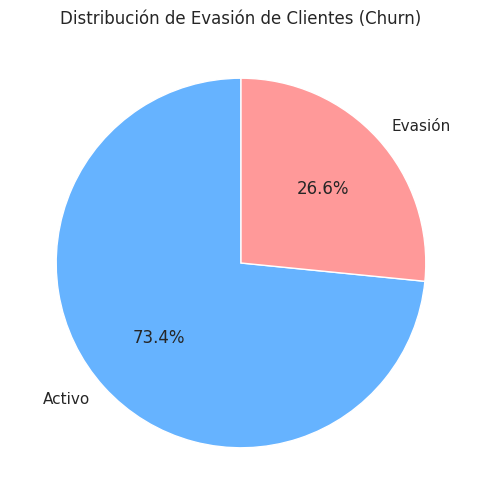

In [ ]:
# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(evasion_cliente, labels=evasion_cliente.index.map({True: 'Evasión', False: 'Activo'}),
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.savefig('Distribución de Evasión de Clientes (Churn).png')
plt.show()

/tmp/ipython-input-47-181642515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_normalizado, x='cliente_actual', palette='pastel')


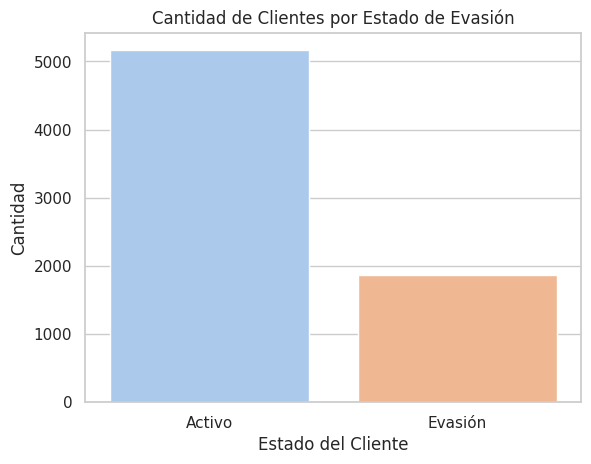

In [ ]:
# Alternativa con gráfico de barras
sns.countplot(data=df_normalizado, x='cliente_actual', palette='pastel')
plt.xticks([0, 1], ['Activo', 'Evasión'])
plt.title('Cantidad de Clientes por Estado de Evasión')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad')
plt.savefig('Cantidad de Clientes por Estado de Evasión.png')
plt.show()

### **Recuento de evasión por variables categóricas y numéricas**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [ ]:
# Ver valores únicos y sus frecuencias para todas las columnas

for col in df_normalizado.columns:
    print(f"--- {col} ---")
    print(df_normalizado[col].value_counts(dropna=False))  # incluye NaN si existen
    print()

--- id_cliente ---
id_cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64

--- cliente_actual ---
cliente_actual
False    5163
True     1869
Name: count, dtype: int64

--- genero ---
genero
Masculino    3549
Femenino     3483
Name: count, dtype: int64

--- ciudadano_mayor ---
ciudadano_mayor
False    5890
True     1142
Name: count, dtype: int64

--- pareja ---
pareja
False    3639
True     3393
Name: count, dtype: int64

--- dependientes ---
dependientes
False    4933
True     2099
Name: count, dtype: int64

--- permanencia_meses ---
permanencia_meses
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

--- servicio_telefono ---
servicio_telefono
True     6352
False     680
Name: count, dtype: int64

--- lineas_multiples -

In [ ]:
# Para mejorar la legibilidad, puedes usar estos diccionarios de mapeo para
# mostrar etiquetas más amigables en los gráficos: %% [markdown]

# Diccionarios para mejorar legibilidad
map_genero = {'Masculino': 'Hombre', 'Femenino': 'Mujer'}
map_booleano = {False: 'No', True: 'Sí'}
map_churn = {False: 'Activo', True: 'Evasor'}

# Crear nuevas columnas legibles
df_normalizado['genero_legible'] = df_normalizado['genero'].map(map_genero)
df_normalizado['mayor_legible'] = df_normalizado['ciudadano_mayor'].map(map_booleano)
df_normalizado['pareja_legible'] = df_normalizado['pareja'].map(map_booleano)
df_normalizado['dependientes_legible'] = df_normalizado['dependientes'].map(map_booleano)
df_normalizado['cliente_estado'] = df_normalizado['cliente_actual'].map(map_churn)

df_normalizado.head()

,id_cliente,cliente_actual,genero,ciudadano_mayor,pareja,dependientes,permanencia_meses,servicio_telefono,lineas_multiples,servicio_internet,...,facturacion_sin_papel,metodo_pago,cargos_mensuales,cargos_totales,cargo_por_dia,genero_legible,mayor_legible,pareja_legible,dependientes_legible,cliente_estado
0,0002-ORFBO,False,Femenino,False,True,True,9,True,No,DSL,...,True,Cheque por correo,65.6,593.30,2.19,Mujer,No,Sí,Sí,Activo
1,0003-MKNFE,False,Masculino,False,False,False,9,True,Sí,DSL,...,False,Cheque por correo,59.9,542.40,2.00,Hombre,No,No,No,Activo
2,0004-TLHLJ,True,Masculino,False,False,False,4,True,No,Fibra óptica,...,True,Cheque electrónico,73.9,280.85,2.46,Hombre,No,No,No,Evasor
3,0011-IGKFF,True,Masculino,True,True,False,13,True,No,Fibra óptica,...,True,Cheque electrónico,98.0,1237.85,3.27,Hombre,Sí,Sí,No,Evasor
4,0013-EXCHZ,True,Femenino,True,True,False,3,True,No,Fibra óptica,...,True,Cheque por correo,83.9,267.40,2.80,Mujer,Sí,Sí,No,Evasor


#### 🔍 **Análisis 1: Variables personales vs Evasión**

##### 🔹 1. genero vs cliente_actual


Pregunta: ¿Existe diferencia significativa en la evasión entre hombres y mujeres?

📊 Gráfico sugerido:

Gráfico de barras agrupadas

##### 🔹 2. ciudadano_mayor vs cliente_actual
Pregunta: ¿Los adultos mayores tienden más o menos a cancelar?

📊 Gráfico sugerido:

Gráfico de barras agrupadas

##### 🔹 3. pareja vs cliente_actual
Pregunta: ¿Las personas con pareja son más estables como clientes?

📊 Gráfico sugerido:

Gráfico de barras agrupadas

##### 🔹 4. dependientes vs cliente_actual
Pregunta: ¿Tener personas a cargo influye en la permanencia como cliente?

📊 Gráfico sugerido:

Gráfico de barras agrupadas

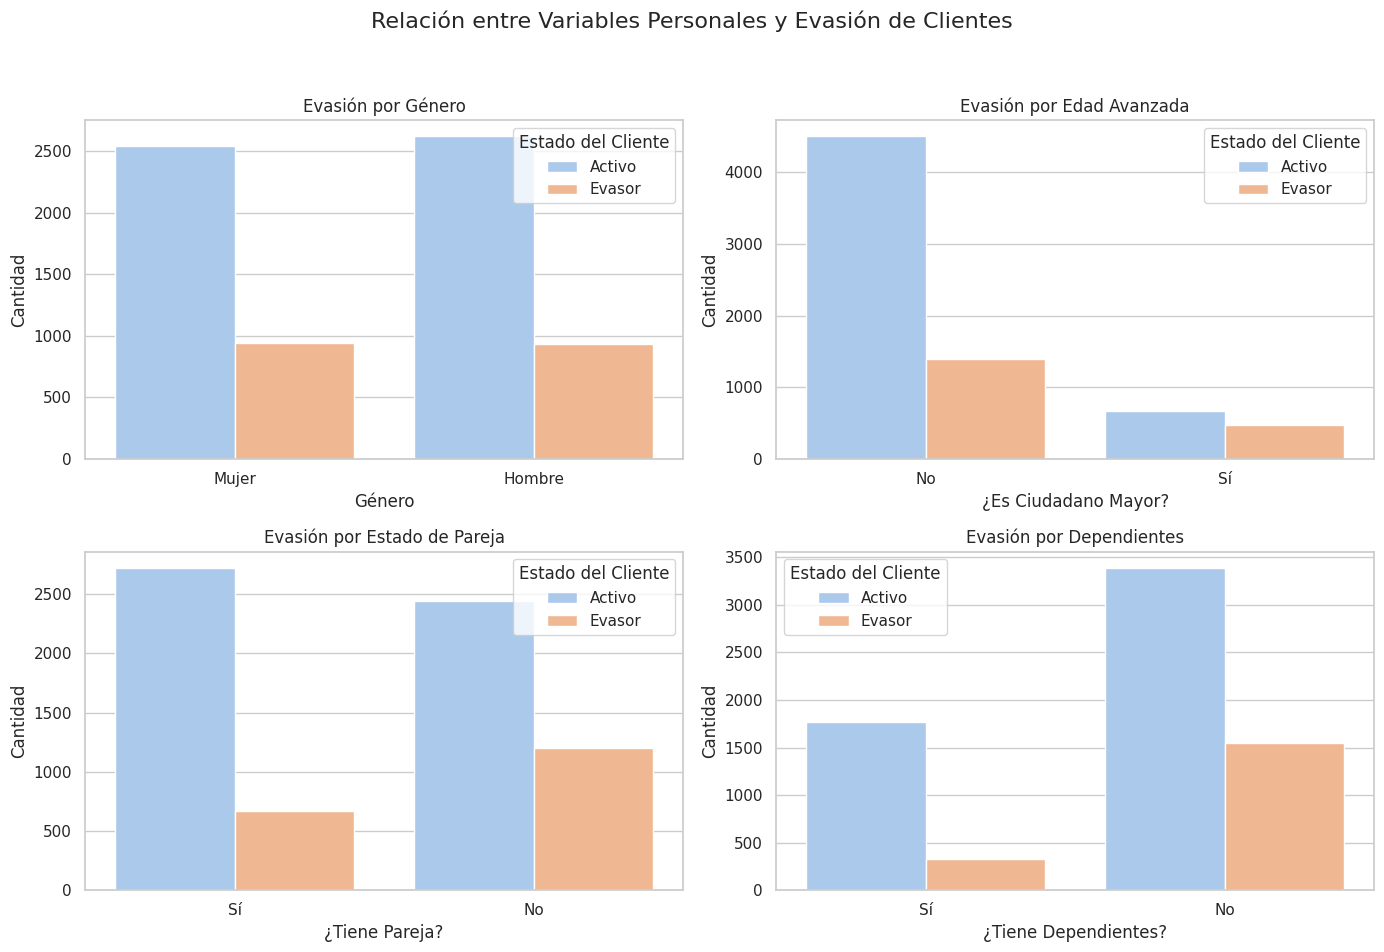

In [ ]:
# Ajustes generales de estilo
sns.set(style='whitegrid', palette='pastel')

# Crear figura general
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Personales y Evasión de Clientes', fontsize=16)

# Gráfico 1: Género
sns.countplot(data=df_normalizado, x='genero_legible', hue='cliente_estado', ax=axs[0, 0])
axs[0, 0].set_title('Evasión por Género')
axs[0, 0].set_xlabel('Género')
axs[0, 0].set_ylabel('Cantidad')

# Gráfico 2: Ciudadano Mayor
sns.countplot(data=df_normalizado, x='mayor_legible', hue='cliente_estado', ax=axs[0, 1])
axs[0, 1].set_title('Evasión por Edad Avanzada')
axs[0, 1].set_xlabel('¿Es Ciudadano Mayor?')
axs[0, 1].set_ylabel('Cantidad')

# Gráfico 3: Pareja
sns.countplot(data=df_normalizado, x='pareja_legible', hue='cliente_estado', ax=axs[1, 0])
axs[1, 0].set_title('Evasión por Estado de Pareja')
axs[1, 0].set_xlabel('¿Tiene Pareja?')
axs[1, 0].set_ylabel('Cantidad')

# Gráfico 4: Dependientes
sns.countplot(data=df_normalizado, x='dependientes_legible', hue='cliente_estado', ax=axs[1, 1])
axs[1, 1].set_title('Evasión por Dependientes')
axs[1, 1].set_xlabel('¿Tiene Dependientes?')
axs[1, 1].set_ylabel('Cantidad')

# Ajustes finales
for ax in axs.flat:
    ax.legend(title='Estado del Cliente')
    for label in ax.get_xticklabels():
        label.set_rotation(0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Espacio para el título general
plt.savefig('Relación entre Variables Personales y Evasión de Clientes.png')
plt.show()

#### 🔍 **Análisis 2: Variables contractuales vs Evasión**

##### 🔹 1. Contrato vs cliente_actual

¿Qué tipo de contratos tienen aquellos clientes que son más propensos a dejar la compañía?

##### 🔹 2. metodo_pago vs cliente_actual

¿Qué método de pago está relacionado con la mayor tasa de evación?

##### 🔹 3. facturacion_sin_papel vs cliente_actual

¿El recibir la factura de manera electrónica o papel influyen el nivel de evasión?

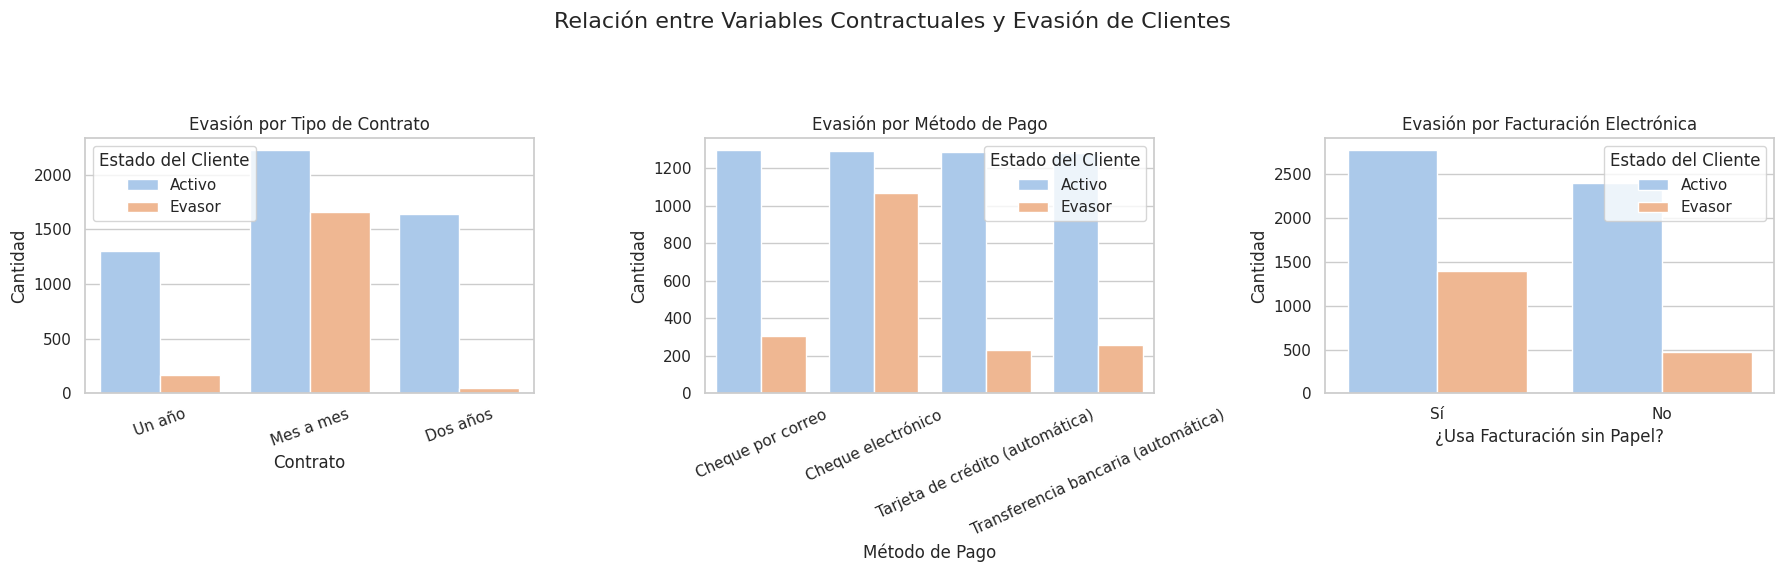

In [ ]:
# Mapeo adicional para legibilidad
df_normalizado['factura_legible'] = df_normalizado['facturacion_sin_papel'].map(map_booleano)

# Crear figura general
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Relación entre Variables Contractuales y Evasión de Clientes', fontsize=16)

# Gráfico 1: Tipo de Contrato
sns.countplot(data=df_normalizado, x='contrato', hue='cliente_estado', ax=axs[0])
axs[0].set_title('Evasión por Tipo de Contrato')
axs[0].set_xlabel('Contrato')
axs[0].set_ylabel('Cantidad')
axs[0].tick_params(axis='x', rotation=20)

# Gráfico 2: Método de Pago
sns.countplot(data=df_normalizado, x='metodo_pago', hue='cliente_estado', ax=axs[1])
axs[1].set_title('Evasión por Método de Pago')
axs[1].set_xlabel('Método de Pago')
axs[1].set_ylabel('Cantidad')
axs[1].tick_params(axis='x', rotation=25)

# Gráfico 3: Facturación sin Papel
sns.countplot(data=df_normalizado, x='factura_legible', hue='cliente_estado', ax=axs[2])
axs[2].set_title('Evasión por Facturación Electrónica')
axs[2].set_xlabel('¿Usa Facturación sin Papel?')
axs[2].set_ylabel('Cantidad')

# Ajustes finales
for ax in axs.flat:
    ax.legend(title='Estado del Cliente')

plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.savefig('Relación entre Variables Contractuales y Evasión de Clientes.png')
plt.show()

#### 🔍 **Análisis 3: Servicios contratados vs Evasión**

Este análisis te ayuda a identificar si usar o no ciertos servicios (complementarios u opcionales) está relacionado con la evasión de clientes. Puede revelar, por ejemplo, si los clientes con más servicios activos son más leales.

**PREGUNTAS**

¿Tener servicios adicionales disminuye la evasión?

¿Los clientes sin internet (o que no usan los servicios asociados) tienden más a irse?

¿Ciertos servicios son más comunes entre clientes que se mantienen?

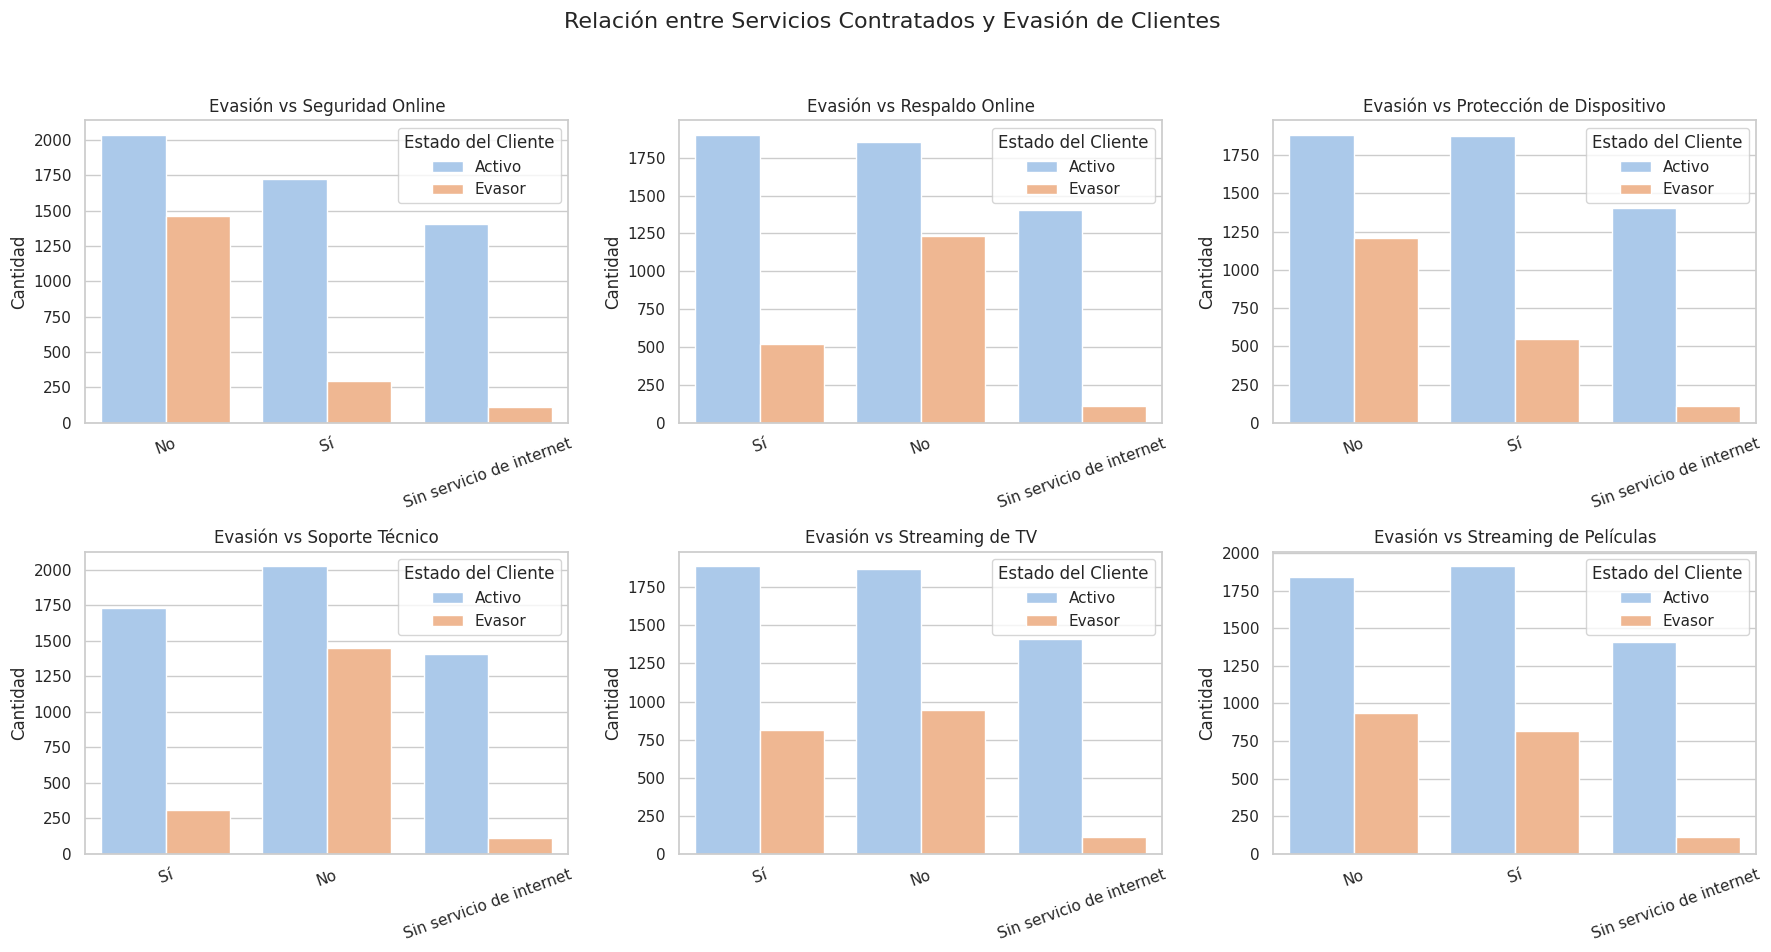

In [ ]:
# Crear figura con subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relación entre Servicios Contratados y Evasión de Clientes', fontsize=16)

# Lista de columnas a analizar
servicios = [
    ('seguridad_online', 'Evasión vs Seguridad Online'),
    ('respaldo_online', 'Evasión vs Respaldo Online'),
    ('proteccion_dispositivo', 'Evasión vs Protección de Dispositivo'),
    ('soporte_tecnico', 'Evasión vs Soporte Técnico'),
    ('streaming_tv', 'Evasión vs Streaming de TV'),
    ('streaming_peliculas', 'Evasión vs Streaming de Películas')
]

# Iterar sobre servicios y crear los gráficos
for i, (columna, titulo) in enumerate(servicios):
    fila = i // 3
    col = i % 3
    sns.countplot(data=df_normalizado, x=columna, hue='cliente_estado', ax=axs[fila, col])
    axs[fila, col].set_title(titulo)
    axs[fila, col].set_xlabel('')
    axs[fila, col].set_ylabel('Cantidad')
    axs[fila, col].tick_params(axis='x', rotation=20)
    axs[fila, col].legend(title='Estado del Cliente')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Relación entre Servicios Contratados y Evasión de Clientes.png')
plt.show()


#### 🔍 **Análisis 4: Variables continuas agrupadas por rangos vs Evasión**

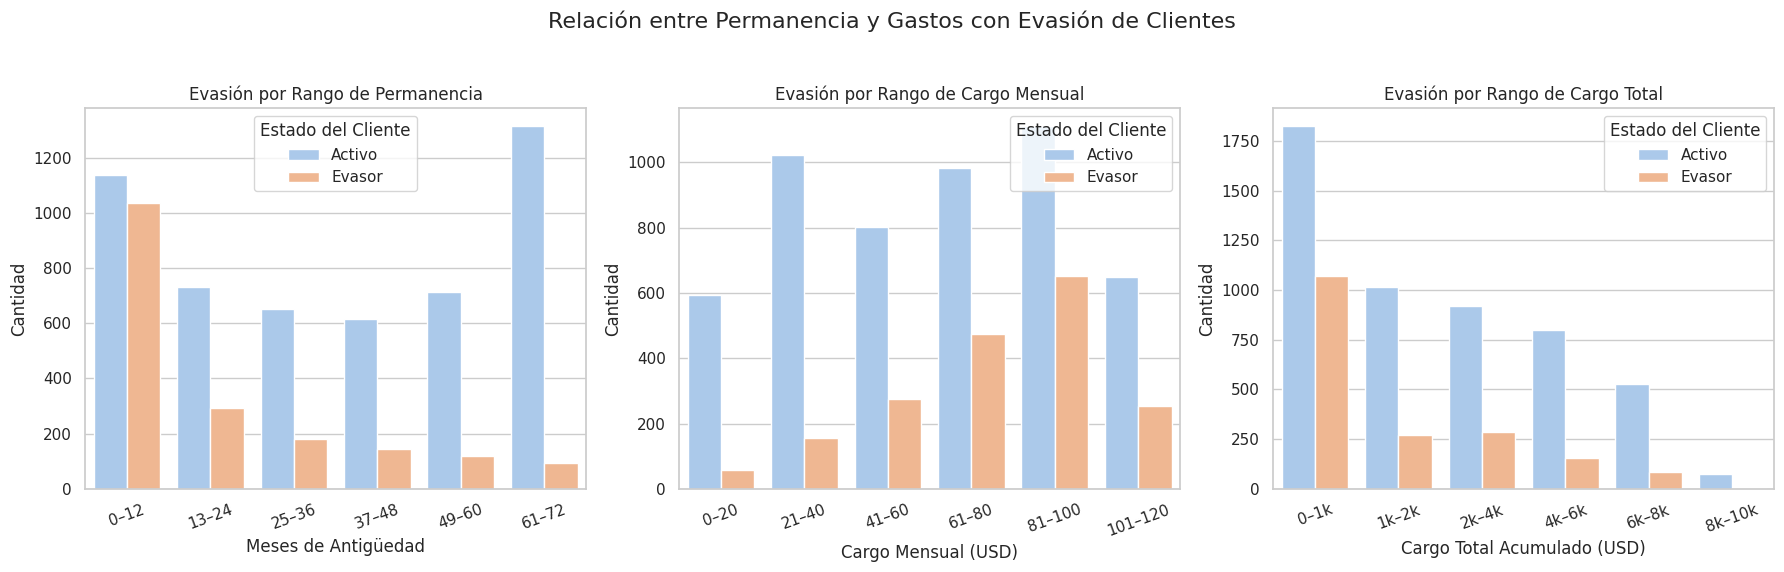

In [ ]:
import pandas as pd

# Crear intervalos categóricos
df_normalizado['rango_permanencia'] = pd.cut(df_normalizado['permanencia_meses'],
                                              bins=[0, 12, 24, 36, 48, 60, 72],
                                              labels=['0–12', '13–24', '25–36', '37–48', '49–60', '61–72'])

df_normalizado['rango_cargos_mensuales'] = pd.cut(df_normalizado['cargos_mensuales'],
                                                   bins=[0, 20, 40, 60, 80, 100, 120],
                                                   labels=['0–20', '21–40', '41–60', '61–80', '81–100', '101–120'])

df_normalizado['rango_cargos_totales'] = pd.cut(df_normalizado['cargos_totales'],
                                                 bins=[0, 1000, 2000, 4000, 6000, 8000, 10000],
                                                 labels=['0–1k', '1k–2k', '2k–4k', '4k–6k', '6k–8k', '8k–10k'])

# Crear figura general
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Relación entre Permanencia y Gastos con Evasión de Clientes', fontsize=16)

# Gráfico 1: Permanencia
sns.countplot(data=df_normalizado, x='rango_permanencia', hue='cliente_estado', ax=axs[0])
axs[0].set_title('Evasión por Rango de Permanencia')
axs[0].set_xlabel('Meses de Antigüedad')
axs[0].set_ylabel('Cantidad')

# Gráfico 2: Cargos mensuales
sns.countplot(data=df_normalizado, x='rango_cargos_mensuales', hue='cliente_estado', ax=axs[1])
axs[1].set_title('Evasión por Rango de Cargo Mensual')
axs[1].set_xlabel('Cargo Mensual (USD)')
axs[1].set_ylabel('Cantidad')

# Gráfico 3: Cargos totales
sns.countplot(data=df_normalizado, x='rango_cargos_totales', hue='cliente_estado', ax=axs[2])
axs[2].set_title('Evasión por Rango de Cargo Total')
axs[2].set_xlabel('Cargo Total Acumulado (USD)')
axs[2].set_ylabel('Cantidad')

# Ajustes finales
for ax in axs.flat:
    ax.legend(title='Estado del Cliente')
    ax.tick_params(axis='x', rotation=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Relación entre Permanencia y Gastos con Evasión de Clientes.png')
plt.show()


#### 🔍 **Análisis 5: de correlación entre variables**

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.
🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀

In [ ]:
# La función corr() solo funciona con columnas numéricas, por lo que vamos a crear una versión
# numérica de la columna cliente_actual: Esto convierte: False → 0 (cliente activo),
# True → 1 (evasor)
df_normalizado['churn_num'] = df_normalizado['cliente_actual'].astype(int)
df_normalizado.head()

,id_cliente,cliente_actual,genero,ciudadano_mayor,pareja,dependientes,permanencia_meses,servicio_telefono,lineas_multiples,servicio_internet,...,genero_legible,mayor_legible,pareja_legible,dependientes_legible,cliente_estado,factura_legible,rango_permanencia,rango_cargos_mensuales,rango_cargos_totales,churn_num
0,0002-ORFBO,False,Femenino,False,True,True,9,True,No,DSL,...,Mujer,No,Sí,Sí,Activo,Sí,0–12,61–80,0–1k,0
1,0003-MKNFE,False,Masculino,False,False,False,9,True,Sí,DSL,...,Hombre,No,No,No,Activo,No,0–12,41–60,0–1k,0
2,0004-TLHLJ,True,Masculino,False,False,False,4,True,No,Fibra óptica,...,Hombre,No,No,No,Evasor,Sí,0–12,61–80,0–1k,1
3,0011-IGKFF,True,Masculino,True,True,False,13,True,No,Fibra óptica,...,Hombre,Sí,Sí,No,Evasor,Sí,13–24,81–100,1k–2k,1
4,0013-EXCHZ,True,Femenino,True,True,False,3,True,No,Fibra óptica,...,Mujer,Sí,Sí,No,Evasor,Sí,0–12,81–100,0–1k,1


In [ ]:
#Calcular número de servicios contratados
# Podemos sumar los servicios tipo "Sí", excluyendo respuestas como 'No' o 'Sin
# servicio de internet'.

# Columnas de servicios con valores tipo 'Sí' / 'No' / 'Sin servicio...'
servicios_cols = [
    'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]

# Crear una nueva columna con el total de servicios contratados ('Sí')
df_normalizado['num_servicios'] = df_normalizado[servicios_cols].apply(lambda fila: sum(fila == 'Sí'), axis=1)

In [ ]:
# Ver correlaciones numéricas con churn

# Calcular correlación
correlaciones = df_normalizado[['churn_num', 'cargo_por_dia', 'cargos_mensuales', 'cargos_totales',
                                 'permanencia_meses', 'num_servicios']].corr()

print(correlaciones['churn_num'].sort_values(ascending=False))

# Esto te dirá qué variables numéricas están más asociadas con el churn
# (positivo = mayor probabilidad de evasión, negativo = menor).


churn_num            1.000000
cargo_por_dia        0.192914
cargos_mensuales     0.192858
num_servicios       -0.087882
cargos_totales      -0.199484
permanencia_meses   -0.354049
Name: churn_num, dtype: float64


/tmp/ipython-input-53-1921496460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='cliente_estado', y='cargo_por_dia', palette='pastel')


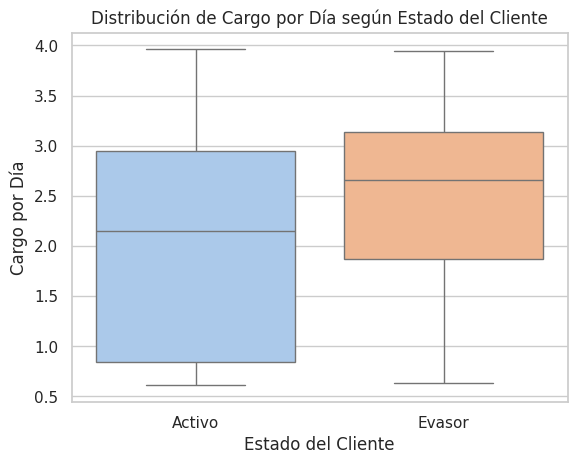

/tmp/ipython-input-53-1921496460.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='cliente_estado', y='num_servicios', palette='pastel')


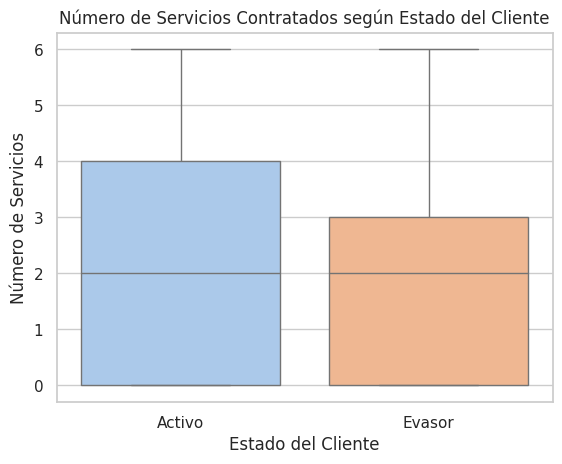

In [ ]:
# Gráficos de dispersión

# Dispersión: cargo por día vs churn
sns.boxplot(data=df_normalizado, x='cliente_estado', y='cargo_por_dia', palette='pastel')
plt.title('Distribución de Cargo por Día según Estado del Cliente')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cargo por Día')
plt.savefig('Distribución de Cargo por Día según Estado del Cliente.png')
plt.show()

# Dispersión: número de servicios contratados vs churn
sns.boxplot(data=df_normalizado, x='cliente_estado', y='num_servicios', palette='pastel')
plt.title('Número de Servicios Contratados según Estado del Cliente')
plt.xlabel('Estado del Cliente')
plt.ylabel('Número de Servicios')
plt.savefig('Número de Servicios Contratados según Estado del Cliente.png')
plt.show()

🧠 ¿Qué podrías interpretar?
¿Los que pagan más por día abandonan más?

¿Contratar más servicios genera fidelización?

¿Qué variable numérica se correlaciona más fuerte (positiva o negativa) con el churn?

##📄Informe final- Telecom X - **Análisis de Evasión de Clientes**

### **Introducción:**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto **"Churn de Clientes"**. La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será **recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa**. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

### **Limpieza y Tratamiento de Datos:** Describe los pasos realizados para importar, limpiar y procesar los datos.

1. Extracción de de información:
Se accedió a la url: https://raw.githubusercontent.com/byfurkation/TelecomX_datos/d3d77c77396a50d0951630ec521dc3b048607b6f/TelecomX_Data.json, la cual fue proveída en un repositorio y lista para la extracción de datos.

* Utilizando el Notebook Júpiter de Google Colab,  se utiliza el método "pd. read_ Json" , Pues el origen del archivo estaba en este formato de datos. De esta manera también se aplicó el método normalize a las columnas: customer, phone, internet and account, y se concatenaron para mantenerlas en un solo Data, el cual fue nombrado df_ normalizado.

* Se utilizaron constantemente los métodos de exploración de datos al Data frame, tales como: Head, sample, info, para conocer la evolución del Data frame y revisar los cambios que se fueron adicionando durante todo el tratamiento de los datos.

2. Limpieza y Procesamiento de datos.

* Se leyó el diccionario de términos de las columnas que nos fue proveído junto con el Data set para entender el contenido de cada una de ellas y saber cómo tratarlas.

* Se utilizaron constantemente los métodos de exploración de datos al Data frame, tales como: Head, sample, info, para conocer la evolución del Data frame y revisar los cambios que se fueron adicionando durante todo el tratamiento de los datos.

* A continuación se procedió la comprobación de incoherencia en los datos, en este paso se verifica si hay problemas en los datos que puedan afectar el análisis. Se presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

* Como primer paso se procedió a conocer el conteo de los valores cada columna con el objetivo de conocer si la variedad de valores dentro de cada una de ellas para conocer su posterior tratamiento. Como ejemplo de esto se encontró que dentro de la columna "churn" había 224 registros con espacios vacíos (" "), a lo cual sin tener ninguna manera clara de poder llenar los mismos, se eliminaron Pues representaban el 3% con datos faltantes en la columna. Se habría ido con nuestro jefe del departamento o Superior jerárquico a fin de averiguar Cuál es el tratamiento correcto de los datos de este tipo.

* Ese fue otro. Donde se utilizó el método info para verificar que efectivamente se habían eliminado las filas correspondientes en todas las columnas.

* Después se utilizó el método info para conocer los tipos de datos en que estaban formateadas las columnas y saber a cuáles tipos de datos eran necesario cambiarlas.

* Antes de proceder a ese cambio se hizo una copia del Data frame mediante el método ".copy()" a fin de que python no nos siguiera arrancando una advertencia en la que nos indica que probablemente estemos trabajando con una visualización del Data frame y no el Data frame real como tal. Razón por la cual a efecto de no perder avance nuestro trabajo se le aplicó dicho método a nuestra Data frame.

* Se le aplicó los cambios a las columnas de la manera siguiente: primero se menciona el tipo de dato actual y después el tipo de dato al que necesita ser cambiado, de no ser necesario el cambio se habría puesto la palabra ok.

0 customerID 7043 non-null object ok

1 Churn 7043 non-null object boolean

2 gender 7043 non-null object ok

3 SeniorCitizen 7043 non-null int64- boolean

4 Partner 7043 non-null object boolean

5 Dependents 7043 non-null object boolean

6 tenure 7043 non-null int64 ok

7 PhoneService 7043 non-null object boolean

8 MultipleLines 7043 non-null object ok

9 InternetService 7043 non-null object ok

10 OnlineSecurity 7043 non-null object ok

11 OnlineBackup 7043 non-null object ok

12 DeviceProtection 7043 non-null object ok

13 TechSupport 7043 non-null object ok

14 StreamingTV 7043 non-null object ok

15 StreamingMovies 7043 non-null object ok

16 Contract 7043 non-null object ok

17 PaperlessBilling 7043 non-null object boolean

18 PaymentMethod 7043 non-null object ok

19 Charges.Monthly 7043 non-null float64 ok

20 Charges.Total 7043 non-null object float 64



### **Análisis Exploratorio de Datos:** Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

<center> <font size=5> Análisis Descriptivo </font>  </center>

Para comenzar, se realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [ ]:
# análisis descriptivo de los datos, calculando métricas como media, mediana,
# desviación estándar y otras medidas que ayuden a comprender mejor la
# distribución y el comportamiento de los clientes.
df_normalizado.describe()

,permanencia_meses,cargos_mensuales,cargos_totales,cargo_por_dia,churn_num,num_servicios
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891,0.265785,2.038111
std,24.545260,30.085974,2266.771362,1.002955,0.441782,1.847161
min,1.000000,18.250000,18.800000,0.610000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,1.187500,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,2.340000,0.000000,2.000000
75%,55.000000,89.862500,3794.737500,2.992500,1.000000,3.000000
max,72.000000,118.750000,8684.800000,3.960000,1.000000,6.000000




**Permanencia en Meses**

La permanencia promedio de los clientes es de 32.4 meses (aproximadamente 2.7 años), con una desviación estándar considerable de 24.5 meses, lo que indica una alta variabilidad en la lealtad del cliente. El 25% de los clientes tiene una permanencia muy baja (9 meses o menos), mientras que el 75% permanece 55 meses o menos. La permanencia máxima registrada es de 72 meses (6 años), sugiriendo que existe un segmento de clientes altamente leales.

**Cargos Mensuales**

Los cargos mensuales promedio son de  64.80,conunadistribuciónrelativamenteamplia(desviaciónestándarde 30.09). El rango va desde  18.25hasta 118.75, indicando una diversidad significativa en los planes de servicio. La mediana ($70.35) es ligeramente superior a la media, sugiriendo una distribución con ligera asimetría hacia la izquierda.

**Cargos Totales**

Los cargos totales acumulados muestran un promedio de  2,283.30conunadesviaciónestándarmuyalta( 2,266.77), evidenciando una gran dispersión en los gastos totales de los clientes. El valor máximo de  8,684.80contrastasignificativamenteconelmínimode 18.80, reflejando la diversidad en la duración de permanencia y tipos de servicios contratados.

**Cargo por Día**

El cargo diario promedio es de  2.16,conunadesviaciónestándarde 1.00, indicando una variabilidad moderada. La distribución es relativamente uniforme, con el 50% de los clientes pagando entre  1.19y 2.99 por día. El cargo máximo diario de $3.96 sugiere servicios premium o paquetes completos.

<center> <font size=5> Distribución de evasión o Churn</font>  </center>

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión), misma que ha sido guardada bajo el nombre de cliente_ actual y cliente_ activo, entre los clientes. Se Utilizaron gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

A efecto de entender los gráficos, en la columna cliente_actual, false significa que el cliente no se marchó de la empresa y true que el cliente se marchó, es decir que ya no está activo.

**cliente_actual**

False    5163 = clientes activos = 73.4%

True     1869 = clientes evasores 26.6%

 <center> <font size=5> Distribución de Evasión de Clientes (Churn) </font>  </center>


 ![1. Distribución de Evasión de Clientes](https://github.com/byfurkation/TelecomX_datos/blob/main/assets/1.%20Distribución%20de%20Evasión%20de%20Clientes%20(Churn).png?raw=true)


<center> <font size=5> Cantidad de Clientes por Estado de Evasión </font>  </center>

![2. Cantidad de Clientes por Estado de Evasión](https://github.com/byfurkation/TelecomX_datos/blob/main/assets/2.%20Cantidad%20de%20Clientes%20por%20Estado%20de%20Evasi%C3%B3n.png?raw=true)

<center> <font size=5> Relación entre Variables Personales y Evasión de Clientes </font>  </center>

Los datos muestran, **por** género, que tanto hombres como mujeres presentan patrones similares de evasión, con una ligera mayor proporción de clientes activos masculinos. La **edad avanzada** (ciudadanos mayores) muestra una correlación positiva con la retención, donde los clientes de mayor edad tienden a permanecer más activos. En cuanto al **estado civil**, los clientes con pareja muestran mayor estabilidad, mientras que aquellos sin dependientes presentan tasas de evasión más altas.

![3. Relación entre Variables Personales y Evasión de Clientes](https://github.com/byfurkation/TelecomX_datos/blob/main/assets/3.%20Relaci%C3%B3n%20entre%20Variables%20Personales%20y%20Evasi%C3%B3n%20de%20Clientes.png?raw=True)

<center> <font size=5> Relación entre Variables Contractuales y Evasión de Clientes </font>  </center>

Características Contractuales

El análisis revela que los **contratos** que son pagados mes con mes están fuertemente asociados con la evasión, mientras que los contratos de uno y dos años muestran la mejor retención. Los** métodos de pago automáticos** (tarjeta de crédito y transferencia bancaria) correlacionan con menor evasión comparado con cheques electrónicos, los cuáles representan el nivel mayor de evasores en este método de pago, probablemente se deba a alguna dificultad en el proceso de pago lo cual esté frustrando a los clientes y los lleve a querer dejar la compañía, por lo cual se recomienda investigar más a fondo en ese tema. **La facturación electrónica sin papel** se asocia con mayor retención de clientes.


![4. Relación entre Variables Contractuales y Evasión de Clientes](https://github.com/byfurkation/TelecomX_datos/blob/main/assets/4.%20Relaci%C3%B3n%20entre%20Variables%20Contractuales%20y%20Evasi%C3%B3n%20de%20Clientes.png?raw=True)

<center> <font size=5> Relación entre Servicios Contratados y Evasión de Clientes </font>  </center>

**Servicios Contratados**

Los clientes que utilizan servicios básicos de internet sin servicios adicionales muestran las mayores tasas de evasión. En contraste, aquellos con servicios complementarios como seguridad online, respaldo online y protección de dispositivos presentan mejor retención. El soporte técnico aparece como un factor neutro, mientras que los servicios de streaming (TV y películas) muestran patrones mixtos de retención.


![5. Relación entre Servicios Contratados y Evasión de Clientes](https://github.com/byfurkation/TelecomX_datos/blob/main/assets/5.%20Relaci%C3%B3n%20entre%20Servicios%20Contratados%20y%20Evasi%C3%B3n%20de%20Clientes.png?raw=True)

<center> <font size=5> Relación entre Permanencia y Gastos con Evasión de Clientes </font>  </center>

**Aspectos Financieros**

Se puede observar que los clientes que tienen una permanencia entre 0 y 12 meses son los que mayor nivel de evasión tienen, conforme permanecen más tiempo con la compañía su nivel de evasión disminuye observando que los clientes que tienen entre 61 y 72 meses presentan el menor nivel de evasión.

Después podemos observar, referente al cargo mensual, conforme este aumenta también lo hace el nivel de evasión, lo cual puede señalar Una correlación entre el aumento del precio y el nivel de evasión. Probablemente el nivel más estable en cuanto a clientes activos y menor número de evasores se encuentra en el rango 21- 40. También sería interesante evaluar por qué la tendencia al alza de evasores no continúa dentro del segmento 101-120. Valdría la pena entrevistar o realizar encuestas a estos clientes pues tal vez se encuentren en un Nicho especializado de la compañía que les provea algún servicio en especial el cual los haga fidelizarse aún más.

Podemos observar la evasión o Rango de cargo total, la cual es mayor en el rango de 0 a 1000. Misma evasión disminuye conforme el cargo total aumenta. Lo cual contradice lo señalado por el cargo mensual. Parece más representativo este análisis el cual considera el total, puesto que los clientes que requieren un mayor nivel de atención son aquellos dentro de dicho Rango y que probablemente tengan servicios básicos. Mientras más servicios contrata una persona crece su nivel de estadía dentro de la empresa y su fidelización.


![6. Relación entre Permanencia y Gastos con Evasión de Clientes](https://github.com/byfurkation/TelecomX_datos/blob/main/assets/6.%20Relaci%C3%B3n%20entre%20Permanencia%20y%20Gastos%20con%20Evasi%C3%B3n%20de%20Clientes.png?raw=True)

<center> <font size=5> Distribución de Cargo por Día según Estado del Cliente </font>  </center>

Respecto de este Rango se puede observar que los clientes con mayor nivel de evasión son aquellos que tuvieron un cargo entre dos y tres de manera diaria. Sin embargo también los clientes activos entran en un Rango muy parecido, desde uno hasta tres de cargo diario.

![7. Distribución de Cargo por Día según Estado del Cliente](https://github.com/byfurkation/TelecomX_datos/blob/main/assets/7.%20Distribuci%C3%B3n%20de%20Cargo%20por%20D%C3%ADa%20seg%C3%BAn%20Estado%20del%20Cliente.png?raw=True)

<center> <font size=5> Número de Servicios Contratados según Estado del Cliente</font>  </center>

**Utilización de Servicios**

Los datos indican que los clientes activos tienden a contratar más servicios (mediana de 2 servicios) comparado con los evasores, aunque la diferencia no es dramática. La variabilidad en el número de servicios es mayor entre los clientes activos, sugiriendo diferentes perfiles de consumo.

![8. Número de Servicios Contratados según Estado del Cliente](https://github.com/byfurkation/TelecomX_datos/blob/main/assets/8.%20N%C3%BAmero%20de%20Servicios%20Contratados%20seg%C3%BAn%20Estado%20del%20Cliente.png?raw=True)

<center> <font size=5>  Conclusiones del Análisis Descriptivo </font> </center>

**Segmentación Natural:** Los datos revelan una clara segmentación de clientes basada en permanencia y gasto.

**Oportunidades de Retención:** El 25% de clientes con permanencia menor a 9 meses representa un grupo crítico para estrategias de retención.

**Diversidad de Servicios:** La amplia variabilidad en cargos mensuales sugiere una oferta diversificada de servicios que atiende diferentes segmentos de mercado.

**Correlación Potencial:** La relación entre permanencia y cargos totales sugiere que los clientes de mayor valor tienden a permanecer más tiempo con la empresa.

<center> <font size=5> Conclusiones del análisis </font>  </center>


La retención de clientes está fuertemente influenciada por factores contractuales y de conveniencia más que por características demográficas. Los elementos clave para reducir la evasión incluyen: **promover contratos de mayor duración, facilitar métodos de pago automáticos, impulsar la adopción de servicios complementarios de valor agregado, y enfocar estrategias de retención en clientes con alta permanencia que podrían estar considerando cambios.**

Buscar clientes que tengan **dependientes económicos** que estén en la edad de ocupar el internet, puesto que se notó que aquellos clientes con dependientes económicos tienen un nivel bajo de evasión, lo cual puede estar relacionado con el uso que estos le dan.

La empresa debe desarrollar **estrategias diferenciadas que consideren el perfil de riesgo basado en la combinación de permanencia, tipo de contrato y servicios contratados**. Los **clientes con contratos anuales y servicios básicos requieren atención prioritaria, mientras que aquellos con servicios complementarios y métodos de pago automáticos representan el segmento más estable y rentable.**


### **Recomendaciones:**
* Promover contratos de mayor duración

* Facilitar métodos de pago automáticos

* Impulsar la adopción de servicios complementarios de valor agregado

* Enfocar estrategias de retención en clientes con alta permanencia que podrían estar considerando cambios.

* Captación de clientes con dependientes económicos mediante la oferta de valor agregado para los dependientes económicos.

* Los clientes con contratos anuales y servicios básicos requieren atención prioritaria.

* Los clientes con servicios complementarios y métodos de pago automáticos representan el segmento más estable y rentable.